In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.model_selection import train_test_split

In [59]:
titanic_df = pd.read_csv('./data/titanic_train.csv').drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked']).dropna()
titanic_df['Sex'] = titanic_df['Sex'].map({"male": 1, "female": 0})

In [60]:
x_train, x_test, y_train, y_test = train_test_split(
        titanic_df.drop(columns=['Survived']), 
        titanic_df['Survived'],
        train_size=0.75,
        test_size=0.25,
        random_state=0
    )

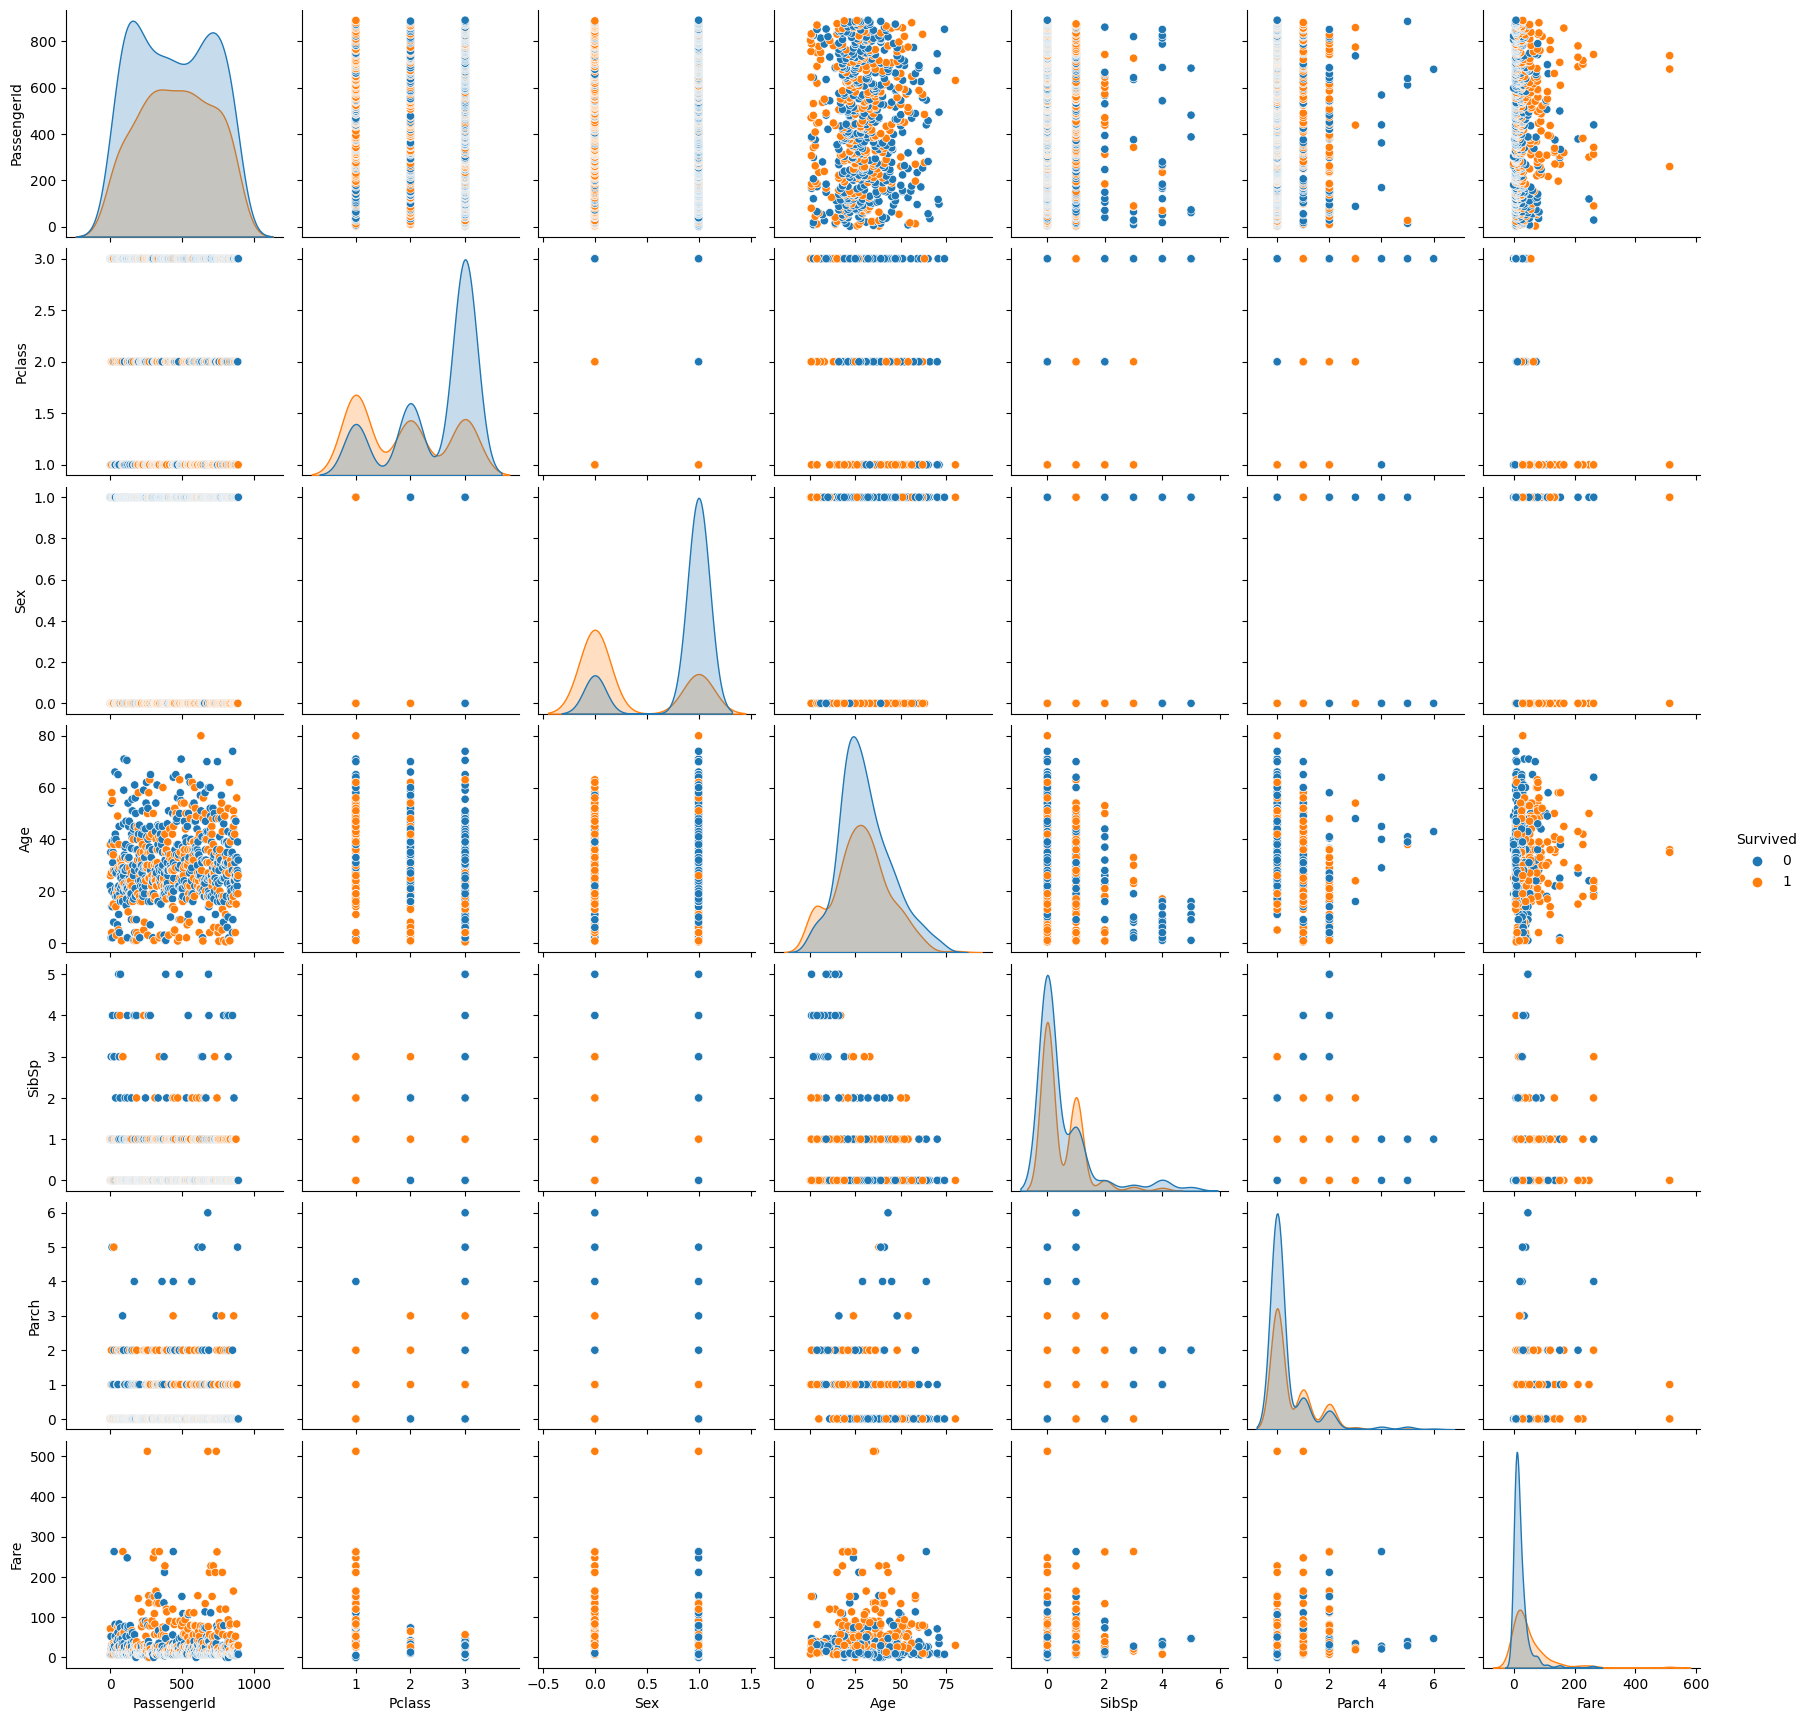

In [61]:
sns.pairplot(titanic_df, hue='Survived')

In [66]:
classifiers = [
    ("svc", SVC()),
    ("knn", KNeighborsClassifier()),
    ("dec_tree", DecisionTreeClassifier())
]
for i in range(1, 4):
    for k in combinations(classifiers, i):
        print(list(k))
        cls = StackingClassifier(list(k))
        cls.fit(X=x_train, y=y_train)
        pred = cls.predict(x_test)
        print(accuracy_score(y_test, pred))

[('svc', SVC())]
0.6536312849162011
[('knn', KNeighborsClassifier())]
0.5865921787709497
[('dec_tree', DecisionTreeClassifier())]
0.7094972067039106
[('svc', SVC()), ('knn', KNeighborsClassifier())]
0.6536312849162011
[('svc', SVC()), ('dec_tree', DecisionTreeClassifier())]
0.7094972067039106
[('knn', KNeighborsClassifier()), ('dec_tree', DecisionTreeClassifier())]
0.7206703910614525
[('svc', SVC()), ('knn', KNeighborsClassifier()), ('dec_tree', DecisionTreeClassifier())]
0.7150837988826816
